In [8]:
# libraries imports
import pandas as pd
from wordfreq import top_n_list, word_frequency

from wikiscraper import WikiScraper

Funkcja lang_confidence_score ma oceniać, jak bardzo zbiór słów z pobranego artykułu /  tekstu pasuje do zbioru najpopularniejszych słów w danym języku. Im wyższy wynik zwraca funkcja, tym lepsze dopasowanie.

In [9]:
def lang_confidence_score(word_counts, language, k):
    # word_counts = słownik ze słowami ile razy dany wyraz wystąpił
    # language = jaki język
    # k = ile najpopularniejszych słów bierzemy pod uwagę

    top_lang_words = set(top_n_list(language, k))

    match_score = 0
    total_words = 0

    for word, count in word_counts.items():
        total_words += count
        if word.lower() in top_lang_words:
            match_score += count

    if total_words == 0:
        return "0%"

    return f"{match_score / total_words * 100:.2f}%"

Algorytm działania funkcji:
bierzemy k najpopularniejszych słów z danego języka (wzorzec), przeglądamy słowa z artykułu i patrzymy, ile z nich jest we wzorcu. Jeżeli dane słowo wystąpiło w słowach z artykułu m razy i słowo to jest na liście k najpopularniejszych słow, to do liczebności doliczamy m. Wpp doliczamy zero. Następnie dzielimy sumę punktów przez całkowitą liczbę słów w artykule. Wynikiem jest procentowa zgodność.

In [10]:
# pobieranie danych
wiki_sources = [
    {"url": "https://bulbapedia.bulbagarden.net", "phrase": "Pikachu", "label": "Bulbapedia (EN)"}
]

raw_texts = {
    "Książka (PL)": """
    Litwo! Ojczyzno moja! ty jesteś jak zdrowie:
Ile cię trzeba cenić, ten tylko się dowie,
Kto cię stracił. Dziś piękność twą w całej ozdobie
Widzę i opisuję, bo tęsknię po tobie.
Panno święta, co Jasnej bronisz Częstochowy
I w Ostrej świecisz Bramie! Ty, co gród zamkowy
Nowogródzki ochraniasz z jego wiernym ludem!
Jak mnie dziecko do zdrowia powróciłaś cudem
(Gdy od płaczącej matki, pod Twoją opiekę
Ofiarowany, martwą podniosłem powiekę;
I zaraz mogłem pieszo, do Twych świątyń progu
Iść za wrócone życie podziękować Bogu),
Tak nas powrócisz cudem na Ojczyzny łono.
Tymczasem przenoś moją duszę utęsknioną
Do tych pagórków leśnych, do tych łąk zielonych,
Szeroko nad błękitnym Niemnem rozciągnionych;
Do tych pól malowanych zbożem rozmaitem,
Wyzłacanych pszenicą, posrebrzanych żytem;
Gdzie bursztynowy świerzop, gryka jak śnieg biała,
Gdzie panieńskim rumieńcem dzięcielina pała,
A wszystko przepasane jakby wstęgą, miedzą
Zieloną, na niej z rzadka ciche grusze siedzą.
Śród takich pól przed laty, nad brzegiem ruczaju,
Na pagórku niewielkim, we brzozowym gaju,
Stał dwór szlachecki, z drzewa, lecz podmurowany;
Świeciły się z daleka pobielane ściany,
Tym bielsze, że odbite od ciemnej zieleni
Topoli, co go bronią od wiatrów jesieni.
Dom mieszkalny niewielki, lecz zewsząd chędogi,
I stodołę miał wielką, i przy niej trzy stogi
Użątku, co pod strzechą zmieścić się nie może.
Widać, że okolica obfita we zboże,
I widać z liczby kopic, co wzdłuż i wszerz smugów
Świecą gęsto jak gwiazdy, widać z liczby pługów
Orzących wcześnie łany ogromne ugoru,
Czarnoziemne, zapewne należne do dworu,
Uprawne dobrze na kształt ogrodowych grządek:
Że w tym domu dostatek mieszka i porządek.
Brama na wciąż otwarta przechodniom ogłasza,
Że gościnna, i wszystkich w gościnę zaprasza.
Właśnie dwukonną bryką wjechał młody panek
I obiegłszy dziedziniec zawrócił przed ganek.
Wysiadł z powozu; konie porzucone same,
Szczypiąc trawę ciągnęły powoli pod bramę.
We dworze pusto: bo drzwi od ganku zamknięto
Zaszczepkami i kołkiem zaszczepki przetknięto.
Podróżny do folwarku nie biegł sług zapytać,
Odemknął, wbiegł do domu, pragnął go powitać.
Dawno domu nie widział, bo w dalekim mieście
Kończył nauki, końca doczekał nareszcie.
Wbiega i okiem chciwie ściany starodawne
Ogląda czule, jako swe znajome dawne.
Też same widzi sprzęty, też same obicia,
Z którymi się zabawiać lubił od powicia,
Lecz mniej wielkie, mniej piękne niż się dawniej zdały.
I też same portrety na ścianach wisiały:
Tu Kościuszko w czamarce krakowskiej, z oczyma
Podniesionymi w niebo, miecz oburącz trzyma;
Takim był, gdy przysięgał na stopniach ołtarzów,
Że tym mieczem wypędzi z Polski trzech mocarzów,
Albo sam na nim padnie. Dalej w polskiej szacie
Siedzi Rejtan, żałośny po wolności stracie;
W ręku trzyma nóż ostrzem zwrócony do łona,
A przed nim leży Fedon i żywot Katona.
Dalej Jasiński, młodzian piękny i posępny;
Obok Korsak, towarzysz jego nieodstępny:
Stoją na szańcach Pragi, na stosach Moskali,
Siekąc wrogów, a Praga już się wkoło pali.
Nawet stary stojący zegar kurantowy
W drewnianej szafie poznał, u wniścia alkowy;
I z dziecinną radością pociągnął za sznurek,
By stary Dąbrowskiego usłyszeć mazurek.
Biegał po całym domu i szukał komnaty,
Gdzie mieszkał dzieckiem będąc, przed dziesięciu laty.
Wchodzi, cofnął się, toczył zdumione źrenice
Po ścianach: w tej komnacie mieszkanie kobiéce!
Któż by tu mieszkał? Stary stryj nie był żonaty;
A ciotka w Petersburgu mieszkała przed laty.
To nie był ochmistrzyni pokój? Fortepiano?
Na nim nuty i książki; wszystko porzucano
Niedbale i bezładnie: nieporządek miły!
Niestare były rączki, co je tak rzuciły.
Tuż i sukienka biała, świeżo z kołka zdjęta
Do ubrania, na krzesła poręczu rozpięta;
A na oknach donice z pachnącymi ziołki,
Geranium, lewkonija, astry i fijołki.
Podróżny stanął w jednym z okien — nowe dziwo:
W sadzie, na brzegu niegdyś zarosłym pokrzywą,
Był maleńki ogródek ścieżkami porznięty,
Pełen bukietów trawy angielskiej i mięty.
Drewniany, drobny, w cyfrę powiązany płotek
Połyskał się wstążkami jaskrawych stokrotek;
Grządki, widać, że były świeżo polewane,
Tuż stało wody pełne naczynie blaszane,
Ale nigdzie nie widać było ogrodniczki;
Tylko co wyszła: jeszcze kołyszą się drzwiczki
Świeżo trącone, blisko drzwi ślad widać nóżki
Na piasku, bez trzewika była i pończoszki;
Na piasku drobnym, suchym, białym na kształt śniegu,
Ślad wyraźny, lecz lekki, odgadniesz, że w biegu
Chybkim był zostawiony nóżkami drobnemi
Od kogoś, co zaledwie dotykał się ziemi.
Podróżny długo w oknie stał patrząc, dumając,
Wonnymi powiewami kwiatów oddychając.
Oblicze aż na krzaki fijołkowe skłonił,
Oczyma ciekawymi po drożynach gonił
I znowu je na drobnych śladach zatrzymywał,
Myślał o nich i, czyje były, odgadywał.
Przypadkiem oczy podniósł, i tuż na parkanie
Stała młoda dziewczyna… Białe jej ubranie
Wysmukłą postać tylko aż do piersi kryje,
Odsłaniając ramiona i łabędzią szyję.
W takim Litwinka tylko chodzić zwykła z rana,
W takim nigdy nie bywa od mężczyzn widziana:
Więc choć świadka nie miała, założyła ręce
Na piersiach, przydawając zasłony sukience.
Włos w pukle nierozwity, lecz w węzełki małe
Pokręcony, schowany w drobne strączki białe,
Dziwnie ozdabiał głowę: bo od słońca blasku
Świecił się jak korona na świętych obrazku.
Twarzy nie było widać; zwrócona na pole
Szukała kogoś okiem, daleko, na dole;
Ujrzała, zaśmiała się i klasnęła w dłonie,
Jak biały ptak zleciała z parkanu na błonie,
I wionęła ogrodem, przez płotki, przez kwiaty,
I po desce opartej o ścianę komnaty…
Nim spostrzegł się, wleciała przez okno, świecąca,
Nagła, cicha i lekka, jak światłość miesiąca.
Nucąc chwyciła suknie, biegła do zwierciadła:
Wtem ujrzała młodzieńca i z rąk jej wypadła
Suknia, a twarz od strachu i dziwu pobladła.
Twarz podróżnego barwą spłonęła rumianą,
Jak obłok, gdy z jutrzenką napotka się raną.
Skromny młodzieniec oczy zmrużył i przysłonił,
Chciał coś mówić, przepraszać; tylko się ukłonił
I cofnął się. Dziewica krzyknęła boleśnie,
Niewyraźnie, jak dziecko przestraszone we śnie;
Podróżny zląkł się, spojrzał; lecz już jej nie było.
Wyszedł zmieszany i czuł, że mu serce biło
Głośno, i sam nie wiedział, czy go miało śmieszyć
To dziwaczne spotkanie, czy wstydzić, czy cieszyć.
Tymczasem na folwarku nie uszło baczności,
Że przed ganek zajechał któryś z nowych gości.
""",

    "Libro (ES)": """
    Querido tío y venerado maestro: Hace cuatro días que llegué con toda felicidad a este
lugar de mi nacimiento, donde he hallado bien de salud a mi padre, al señor vicario y a los
amigos y parientes. El contento de verlos y de hablar con ellos, después de tantos años de
ausencia, me ha embargado el ánimo y me ha robado el tiempo, de suerte que hasta ahora
no he podido escribir a usted.
Usted me lo perdonará.
Como salí de aquí tan niño y he vuelto hecho un hombre, es singular la impresión que
me causan todos estos objetos que guardaba en la memoria. Todo me parece más chico,
mucho más chico; pero también más bonito que el recuerdo que tenía. La casa de mi padre,
que en mi imaginación era inmensa, es sin duda una gran casa de un rico labrador; pero más
pequeña que el Seminario. Lo que ahora comprendo y estimo mejor es el campo de por
aquí. Las huertas, sobre todo, son deliciosas. ¡Qué sendas tan lindas hay entre ellas! A un
lado, y tal vez a ambos, corre el agua cristalina con grato murmullo. Las orillas de las
acequias están cubiertas de hierbas olorosas y de flores de mil clases. En un instante puede
uno coger un gran ramo de violetas. Dan sombra a estas sendas pomposos y gigantescos
nogales, higueras y otros árboles, y forman los vallados la zarzamora, el rosal, el granado
y la madreselva.
Es portentosa la multitud de pajarillos que alegran estos campos y alamedas.
Yo estoy encantado con las huertas, y todas las tardes me paseo por ellas un par de
horas.
Mi padre quiere llevarme a ver sus olivares, sus viñas, sus cortijos; pero nada de esto
hemos visto aún. No he salido del lugar y de las amenas huertas que le circundan.
Es verdad que no me dejan parar con tanta visita.
Hasta cinco mujeres han venido a verme, que todas han sido mis amas y me han
abrazado y besado. Todos me llaman Luisito o el niño de don Pedro, aunque tengo ya veintidós años
cumplidos. Todos preguntan a mi padre por el niño cuando no estoy presente.
Se me figura que son inútiles los libros que he traído para leer, pues ni un instante me
dejan solo.
La dignidad de cacique, que yo creía cosa de broma, es cosa harto seria. Mi padre es
el cacique del lugar.
Apenas hay aquí, quien acierte a comprender lo que llaman mi manía de hacerme
clérigo, y esta buena gente me dice, con un candor selvático, que debo ahorcar los hábitos,
que el ser clérigo está bien para los pobretones; pero que yo, soy un rico heredero, debo
casarme y consolar la vejez de mi padre, dándole media docena de hermosos y robustos
nietos. Para adularme y adular a mi padre, dicen hombres y mujeres que soy un real mozo, muy
salado, que tengo mucho ángel, que mis ojos son muy pícaros y otras sandeces que me
afligen, disgustan y avergüenzan, a pesar de que no soy tímido y conozco las miserias y
locuras de esta vida, para no escandalizarme ni asustarme de nada.
El único defecto que hallan en mí es el de que estoy muy delgadito a fuerza de estudiar.
Para que engorde se proponen no dejarme estudiar ni leer un papel mientras aquí
permanezca, y además hacerme comer cuantos primores de cocina y de repostería se
confeccionan en el lugar. Está visto: quieren cebarme. No hay familia conocida que no me
haya enviado algún obsequio. Ya me envían una torta de bizcocho, ya un cuajado, ya una
pirámide de piñonate, ya un tarro de almíbar.
Los obsequios que me hacen no son sólo estos presentes enviados a casa, sino que
también me han convidado a comer tres o cuatro personas de las más importantes del lugar.
Mañana como en casa de la famosa Pepita Jiménez, de quien, usted habrá oído hablar,
sin duda alguna. Nadie ignora aquí que mi padre la pretende.
Mi padre, a pesar de sus cincuenta y cinco años, está tan bien, que puede poner envidia
a los más gallardos mozos del lugar. Tiene además el atractivo poderoso, irresistible para
algunas mujeres, de sus pasadas conquistas, de su celebridad, de haber sido una especie
de don Juan Tenorio. No conozco aún a Pepita Jiménez. Todos dicen que es muy linda. Yo sospecho que será
una beldad lugareña y algo rústica. Por lo que de ella se cuenta, no acierto a decidir si es buena o mala moralmente; pero sí que es de gran despejo natural. Pepita tendrá veinte
años; es viuda; sólo tres años estuvo casada. Era hija de doña Francisca Gálvez, viuda
como usted sabe, de un capitán retirado
Que le dejó a su muerteSólo su honrosa espada por herencia,
según dice el poeta. Hasta la edad de diez y seis años vivió Pepita con su madre en la mayor
estrechez, casi en la miseria.
Tenía un tío llamado don Gumersindo, poseedor de un mezquinísimo mayorazgo, de
aquellos que en tiempos antiguos una vanidad absurda fundaba. Cualquier persona regular
hubiera vivido con las rentas de este mayorazgo en continuos apuros, llena tal vez de
trampas y sin acertar a darse el lustre y decoro propios de su clase; pero don Gumersindo
era un ser extraordinario: el genio de la economía. No se podía decir que crease riqueza;
pero tenía una extraordinaria facultad de absorción con respecto a la de los otros, y en
punto a consumirla, será difícil hallar sobre la tierra persona alguna en cuyo
mantenimiento, conservación y bienestar hayan tenido menos que afanarse la madre
naturaleza y la industria humana. No se sabe cómo vivió; pero el caso es que vivió hasta
la edad de ochenta años, ahorrando sus rentas íntegras y haciendo crecer su capital por
medio de préstamos muy sobre seguro. Nadie por aquí le critica de usurero, antes bien le
califican de caritativo, porque siendo moderado en todo, hasta en la usura lo era, y no solía
llevar más de un diez por ciento al año, mientras que en toda esta comarca llevan un veinte
y hasta un treinta por ciento y aún parece poco.
    """,

    "Book (EN)" : """
    It is a truth universally acknowledged, that a single man in
possession of a good fortune must be in want of a wife. However
little known the feelings or views of such a man may be on his first
entering a neighbourhood, this truth is so well fixed in the minds of
the surrounding families, that he is considered as the rightful
property of some one or other of their daughters.
“My dear Mr. Bennet,
” said his lady to him one day,
“have you
heard that Netherfield Park is let at last?”
Mr. Bennet replied that he had not.
“But it is,
” returned she; “for Mrs. Long has just been here, and she
told me all about it.
”
Mr. Bennet made no answer.
“Do not you want to know who has taken it?” cried his wife,
impatiently.
“You want to tell me, and I have no objection to hearing it.
”
This was invitation enough.
“Why, my dear, you must know, Mrs. Long says that Netherfield is
taken by a young man of large fortune from the north of England;
that he came down on Monday in a chaise and foura to see the
place, and was so much delighted with it that he agreed with Mr.
Morris immediately; that he is to take possession before
Michaelmas,
b and some of his servants are to be in the house by the
end of next week.
”
“What is his name?”
“Bingley.
”
“Is he married or single?”
“Oh, single, my dear, to be sure! A single man of large fortune; four
or five thousand a year.
What a fine thing for our girls!”
“How so? how can it affect them?”
“My dear Mr. Bennet,
” replied his wife,
“how can you be so
tiresome? You must know that I am thinking of his marrying one of
them.
”
“Is that his design in settling here?”
“Design! nonsense, how can you talk so! But it is very likely that he
may fall in love with one of them, and therefore you must visit him as
soon as he comes.
”
“I see no occasion for that. You and the girls may go, or you may
send them by themselves, which perhaps will be still better, for as
you are as handsome as any of them, Mr. Bingley might like you the
best of the party.
”
“My dear, you flatter me. I certainly have my share of beauty, but I
do not pretend to be any thing extraordinary now. When a woman
has five grown up daughters, she ought to give over thinking of her
own beauty.
”
“In such cases, a woman has not often much beauty to think of.
”
“But, my dear, you must indeed go and see Mr. Bingley when he
comes into the neighbourhood.
”
“It is more than I engage for, I assure you.
”
“But consider your daughters. Only think what an establishment it
would be for one of them. Sir William and Lady Lucas are
determined to go, merely on that account; for in general, you know,
they visit no new comers. Indeed you must go, for it will be
impossible for us to visit him, if you do not.
”
“You are over scrupulous, surely. I dare say Mr. Bingley will be very
glad to see you; and I will send a few lines by you to assure him of
my hearty consent to his marrying whichever he chooses of the girls;
though I must throw in a good word for my little Lizzy.
”
“I desire you will do no such thing. Lizzy is not a bit better than the
others; and I am sure she is not half so handsome as Jane, nor half
so good-humoured as Lydia. But you are always giving her the
preference.
”
“They have none of them much to recommend them,
” replied he:
“they are all silly and ignorant like other girls; but Lizzy has
something more of quickness than her sisters.
”
“Mr. Bennet, how can you abuse your own children in such a way?
You take delight in vexing me. You have no compassion on my poor
”
nerves.
“You mistake me, my dear. I have a high respect for your nerves.
They are my old friends. I have heard you mention them with
consideration these twenty years at least.
”
“Ah, you do not know what I suffer.
”
“But I hope you will get over it, and live to see many young men of
four thousand a year come into the neighbourhood.
”
“It will be no use to us, if twenty such should come, since you will
not visit them.
”
“Depend upon it, my dear, that when there are twenty, I will visit
them all.
”
Mr. Bennet was so odd a mixture of quick parts,
c sarcastic humour,
reserve, and caprice, that the experience of three-and-twenty years
had been insufficient to make his wife understand his character. Her
mind was less difficult to develope. She was a woman of mean
understanding, little information, and uncertain temper. When she
was discontented, she fancied herself nervous. The business of her
life was to get her daughters married; its solace was visiting and
news.

Mr. Bennet was among the earliest of those who waited on Mr.
Bingley. He had always intended to visit him, though to the last
always assuring his wife that he should not go; and till the evening
after the visit was paid she had no knowledge of it. It was then
disclosed in the following manner. Observing his second daughter
employed in trimming a hat, he suddenly addressed her with,
—
“I hope Mr. Bingley will like it, Lizzy.
”
“We are not in a way to know what Mr. Bingley likes,
” said her
mother, resentfully,
“since we are not to visit.
”
“But you forget, mamma,
” said Elizabeth,
“that we shall meet him at
the assemblies, and that Mrs. Long has promised to introduce him.
”
“I do not believe Mrs. Long will do any such thing. She has two
nieces of her own. She is a selfish, hypocritical woman, and I have
no opinion of her.
”
“No more have I,
” said Mr. Bennet; “and I am glad to find that you
do not depend on her serving you.
”
Mrs. Bennet deigned not to make any reply; but, unable to contain
herself, began scolding one of her daughters.
“Don’t keep coughing so, Kitty, for heaven’s sake! Have a little
compassion on my nerves. You tear them to pieces.
”
“Kitty has no discretion in her coughs,
” said her father; “she times
them ill.
”
“I do not cough for my own amusement,
” replied Kitty, fretfully.
“When is your next ball to be, Lizzy?” “To-morrow fortnight.
”
“Ay, so it is,
” cried her mother,
“and Mrs. Long does not come back
till the day before; so, it will be impossible for her to introduce him,
for she will not know him herself.
”
    """
}

Teksty pochodzą z następujących źródeł:
1) "Pan Tadeusz, czyli ostatni zajazd na Litwie", Adam Mickiewicz, https://wolnelektury.pl/katalog/lektura/pan-tadeusz.html
2) "Pepita Jiménez", Juan Valera, https://web.seducoahuila.gob.mx/biblioweb/upload/PEPITA%20JIMENEZ.pdf
3) "Pride and Prejudice", Jane Austen,https://icrrd.com/article/205/pride-and-prejudice-ebook-download-pdf

In [11]:
import re
from collections import Counter

text_data = {}

# pętla for na wypadek, gdyby w przyszłości było koniecznie rozszerzenie źródeł wikipediowych
for src in wiki_sources:
    scraper = WikiScraper(src['phrase'])
    scraper.base_url = src['url']

    if scraper.fetch_data():
        content = scraper.get_article_text()

        if content:
            words = re.findall(r'\w+', content.lower())

for label, text in raw_texts.items():
    words = re.findall(r'\w+', text.lower())
    text_data[label] = Counter(words)

In [12]:
languages_to_check = ['en', 'pl', 'es']
k_values = [3, 10, 100, 1000]

results = []

for text_label, word_count in text_data.items():
    for language in languages_to_check:
        for k in k_values:
            score = lang_confidence_score(word_count, language, k)

            results.append({
                "Source": text_label,
                "Language tested": language,
                "Top K": k,
                "Score": score
            })

df_results = pd.DataFrame(results)

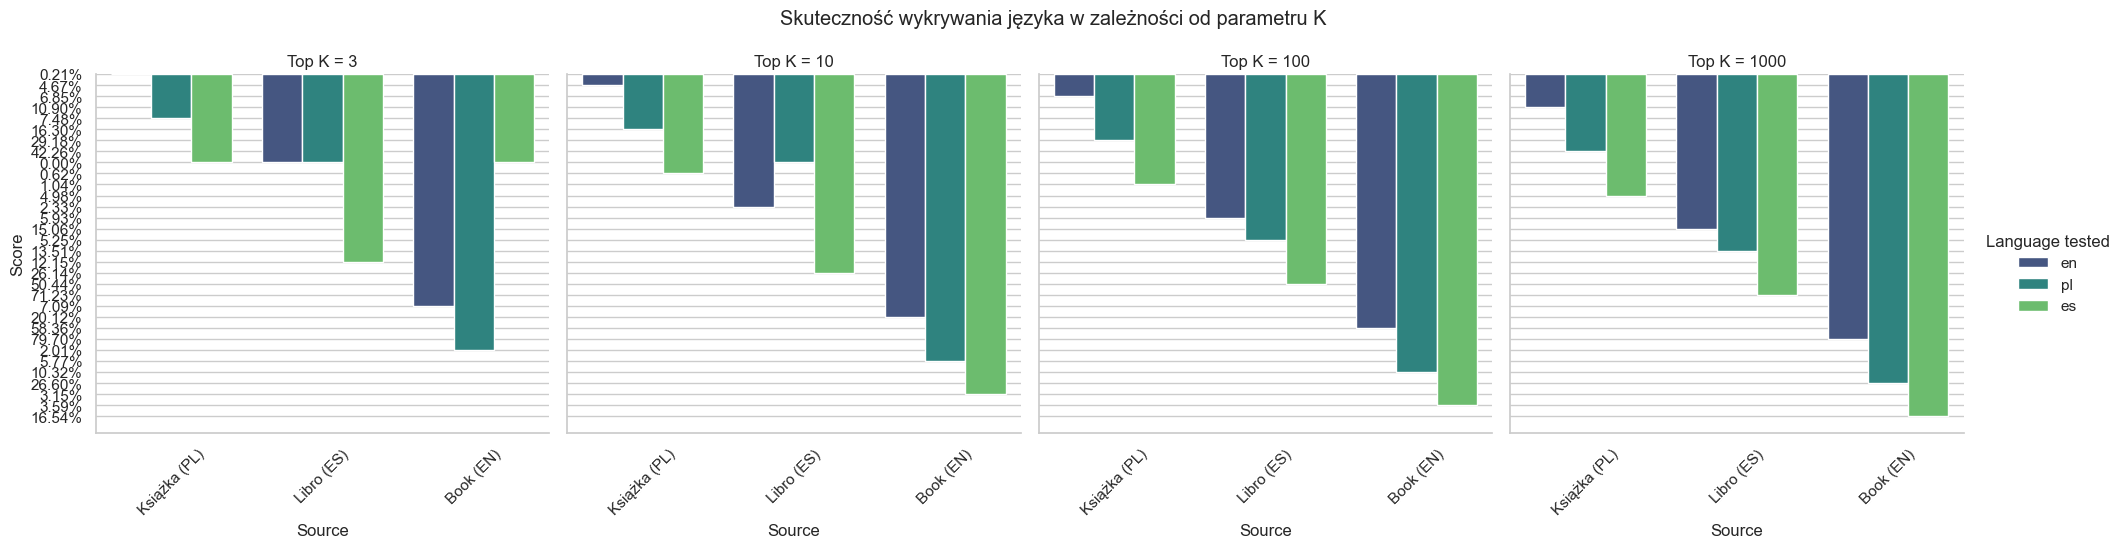